<a href="https://colab.research.google.com/github/Anjanachenchani/Analog-clock/blob/main/exp_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Load the clinical dataset
try:
    data = pd.read_csv("/content/PlayTennis.csv")
    print(data.head())
    print(data.info())
except FileNotFoundError:
    print("Error: The file 'PlayTennis.csv' was not found.")
    exit()

# Encode categorical variables
label_encoder = LabelEncoder()
for column in data.columns:
    data[column] = label_encoder.fit_transform(data[column])

# Split into features and target variable
X = data.drop(columns=["PlayTennis"])  # Replace with your target column name if different
y = data["PlayTennis"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "k-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True)
}

# Train each model, cross-validate, and store predictions
model_scores = {}

for name, model in models.items():
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Get accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    model_scores[name] = accuracy

    # Print model performance
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"{name} Cross-Validation Score: {cv_scores.mean():.4f}")
    print(f"Classification Report for {name}:\n", classification_report(y_test, y_pred))

# Display performance comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_scores.keys()), y=list(model_scores.values()))
plt.title("Model Accuracy Comparison")
plt.xlabel("Classification Algorithm")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()


SyntaxError: invalid non-printable character U+00A0 (<ipython-input-2-4137076ca423>, line 15)

    Outlook Temperature Humidity    Wind PlayTennis
0     Sunny         Hot     High    Weak         No
1     Sunny         Hot     High  Strong         No
2  Overcast         Hot     High    Weak        Yes
3      Rain        Mild     High    Weak        Yes
4      Rain        Cool   Normal    Weak        Yes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Wind         14 non-null     object
 4   PlayTennis   14 non-null     object
dtypes: object(5)
memory usage: 692.0+ bytes
None

Training Logistic Regression...
Logistic Regression Accuracy: 0.6667
Logistic Regression Cross-Validation Score: 0.6333
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.00   

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predic

Decision Tree Accuracy: 0.6667
Decision Tree Cross-Validation Score: 0.5333
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3


Training Random Forest...
Random Forest Accuracy: 1.0000
Random Forest Cross-Validation Score: 0.5333
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3


Training k-Nearest Neighbors...
k-Nearest Neighbors Accuracy: 0.6667
k-Nearest Neigh

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predic

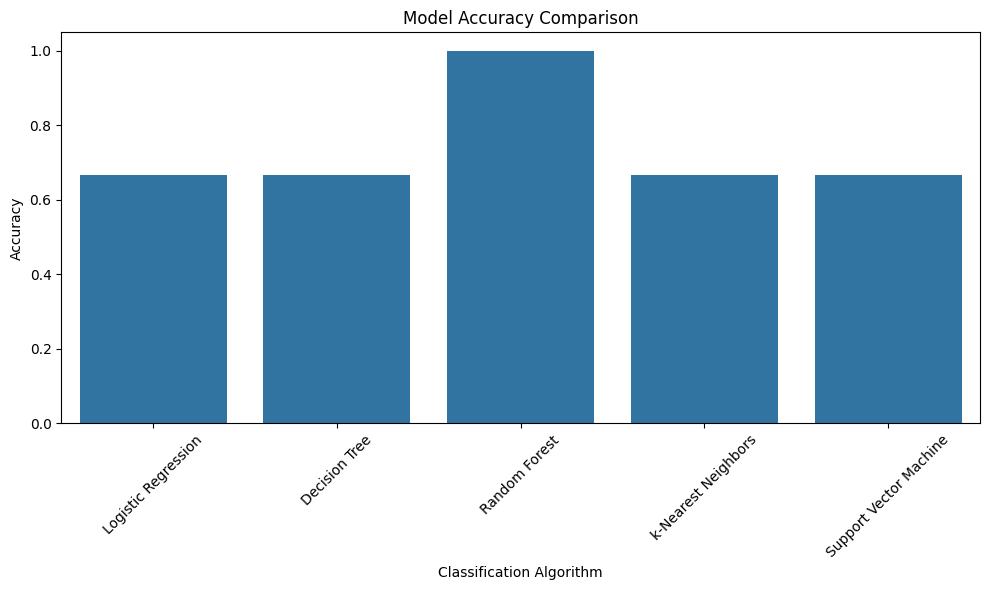

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Load the clinical dataset
try:
    data = pd.read_csv("/content/PlayTennis.csv")
    print(data.head())
    print(data.info())
except FileNotFoundError:
    print("Error: The file 'PlayTennis.csv' was not found.")
    exit()

# Encode categorical variables
label_encoder = LabelEncoder()
for column in data.columns:
    data[column] = label_encoder.fit_transform(data[column])

# Split into features and target variable
X = data.drop(columns=["PlayTennis"])  # Replace with your target column name if different
y = data["PlayTennis"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "k-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True)
}

# Train each model, cross-validate, and store predictions
model_scores = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Get accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    model_scores[name] = accuracy

    # Print model performance
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"{name} Cross-Validation Score: {cv_scores.mean():.4f}")
    print(f"Classification Report for {name}:\n{classification_report(y_test, y_pred)}")

# Display performance comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_scores.keys()), y=list(model_scores.values()))
plt.title("Model Accuracy Comparison")
plt.xlabel("Classification Algorithm")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
